**STOCK PRICE PREDICTION**

---



**OBJECTIVE OF PROJECT:**

Predicting the stock market has been the bane and goal of investors since its inception. Every day billions of dollars are traded on the stock exchange, and behind every dollar is an investor hoping to make a profit in one way or another. Here, your challenge is to build a predictive model that can predict stock prices.

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv('/content/drive/MyDrive/csv file/INR=X.csv')


DATA FEATURING AND PREPROCESSING


In [8]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [9]:
#converting date column in time frame series
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.isnull().sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,74.373533,74.631087,74.011048,74.358489,74.358489,0.0
std,1.417620,1.494521,1.311330,1.426245,1.426245,0.0
min,71.100403,71.279999,71.064003,71.099998,71.099998,0.0
25%,73.546175,73.706577,73.202003,73.531049,73.531049,0.0
50%,74.332001,74.531300,73.881748,74.275799,74.275799,0.0
75%,75.484551,75.737499,75.067053,75.489424,75.489424,0.0
max,77.684998,77.754997,76.496300,77.570000,77.570000,0.0


EXPLORATORY DATA ANALYSIS


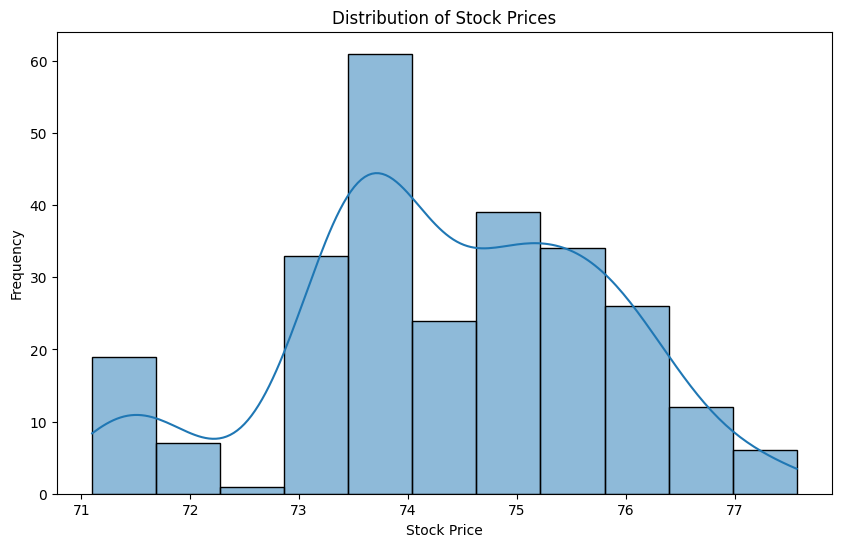

In [12]:
# Visualize the distribution of the stock prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True)
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.title('Distribution of Stock Prices')
plt.show()


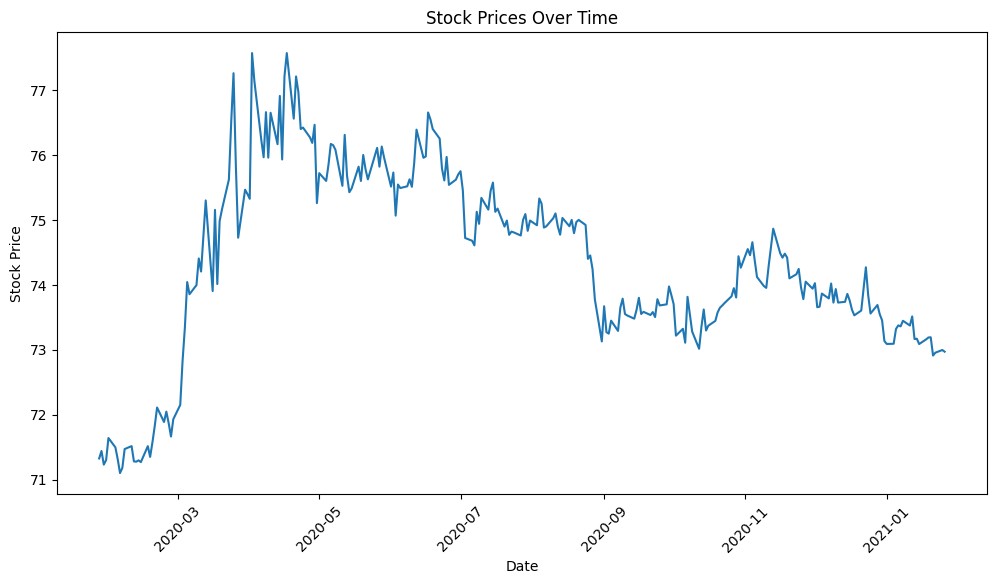

In [13]:
# Visualize the trend of stock prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Prices Over Time')
plt.xticks(rotation=45)
plt.show()

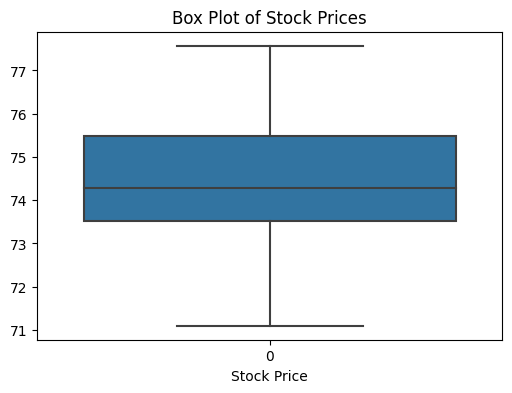

In [14]:
# Check for outliers using box plots
plt.figure(figsize=(6, 4))
sns.boxplot(df['Close'])
plt.xlabel('Stock Price')
plt.title('Box Plot of Stock Prices')
plt.show()



FEATURE SELECTION

<ipython-input-15-c773ba673c8d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


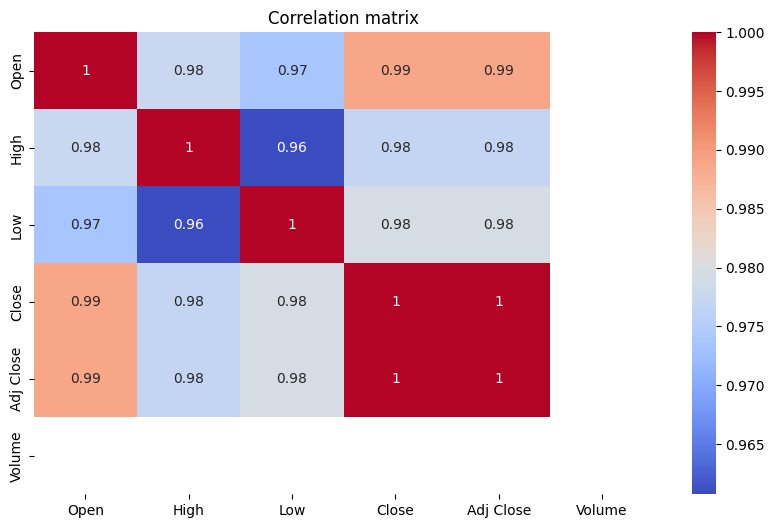

In [15]:
corr_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [16]:
df.dtypes


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [17]:
df['Date'] = df['Date'].astype(np.int64)

In [19]:
target = 'Close'
X = df.drop(target, axis=1)
y = df[target]
model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_
# Sorting features as per importance
indices = np.argsort(importances)[::-1]
sorted_features = X.columns[indices]
# Printing the features importance scores
for feature, importance in zip(sorted_features, importances[indices]):
  print(f'{feature}: {importance}')
# Selecting top k features based on importance
k = 5 # taking out the desired number of features
selected_features = sorted_features[:k]
print(f'Selected Features: {selected_features}')


Adj Close: 0.8384382817015631
Open: 0.06040412505143073
Low: 0.059493867932241144
Date: 0.03417819406654209
High: 0.007485531248223034
Volume: 0.0
Selected Features: Index(['Adj Close', 'Open', 'Low', 'Date', 'High'], dtype='object')


SPLITTING THE DATA


In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
# Spliting the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]
# Creating sequences and labels for training
def create_sequences(data, sequence_length):
  sequences = []
  labels = []
  for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length])
    labels.append(data[i+sequence_length])
  return np.array(sequences), np.array(labels)
sequence_length = 30
train_sequences, train_labels = create_sequences(train_data, sequence_length)
test_sequences, test_labels = create_sequences(test_data, sequence_length)
# Reshaping the test_sequences to match the number of features
test_sequences = test_sequences.reshape(test_sequences.shape[0], test_sequences.shape[1])

APPLYING LSTM


In [23]:
prices = df["Close"].values.reshape(-1, 1)


TEST DATA PREDICTION VISUALIZATION


> Indented block



In [24]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
# model training
model.fit(train_sequences, train_labels, epochs=10, batch_size=32)
# model evaluation
mse = model.evaluate(test_sequences, test_labels)
# Making predictions
predicted_data = model.predict(test_sequences)
predicted_data = predicted_data.reshape(predicted_data.shape[0], 1)
# Inverse scaling for test data
predicted_prices = scaler.inverse_transform(predicted_data)
actual_prices = scaler.inverse_transform(test_labels)


Epoch 1/10
6/6 [==============================] - 12s 63ms/step - loss: 0.2749
Epoch 2/10
6/6 [==============================] - 0s 70ms/step - loss: 0.0354
Epoch 3/10
6/6 [==============================] - 1s 99ms/step - loss: 0.0308
Epoch 4/10
6/6 [==============================] - 0s 76ms/step - loss: 0.0190
Epoch 5/10
6/6 [==============================] - 1s 98ms/step - loss: 0.0171
Epoch 6/10
6/6 [==============================] - 0s 83ms/step - loss: 0.0122
Epoch 7/10
6/6 [==============================] - 0s 54ms/step - loss: 0.0121
Epoch 8/10
6/6 [==============================] - 0s 58ms/step - loss: 0.0108
Epoch 9/10
6/6 [==============================] - 1s 87ms/step - loss: 0.0104
Epoch 10/10
1/1 [==============================] - 2s 2s/step


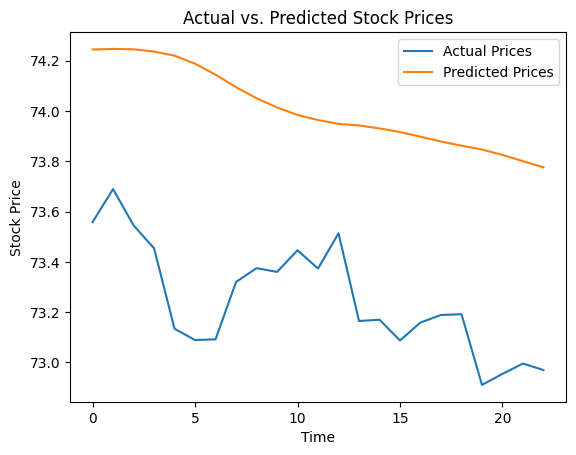

In [25]:
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()


FULL DATA PREDICTION VISUALISATION


In [27]:
import matplotlib.pyplot as plt
# Defining the sequence length
sequence_length = 50
# Create the sequences and labels
sequences, labels = create_sequences(scaled_data, sequence_length)
# Reshaping the input data
sequences = np.reshape(sequences, (sequences.shape[0], sequences.shape[1], 1))
# Defining the input shape for LSTM
input_shape = (sequences.shape[1], 1)
# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=50))
model.add(Dense(units=1))
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Training the model
model.fit(sequences, labels, epochs=10, batch_size=32)
# Making predictions
predicted_fulldata = model.predict(sequences)
predicted_prices = scaler.inverse_transform(predicted_fulldata)
# Inverse scaling for the actual prices
actual_prices = scaler.inverse_transform(labels.reshape(-1, 1))


Epoch 1/10
7/7 [==============================] - 6s 87ms/step - loss: 0.1389
Epoch 2/10
7/7 [==============================] - 1s 84ms/step - loss: 0.0261
Epoch 3/10
7/7 [==============================] - 1s 94ms/step - loss: 0.0117
Epoch 4/10
7/7 [==============================] - 1s 89ms/step - loss: 0.0101
Epoch 5/10
7/7 [==============================] - 1s 79ms/step - loss: 0.0081
Epoch 6/10
7/7 [==============================] - 1s 101ms/step - loss: 0.0065
Epoch 7/10
7/7 [==============================] - 1s 88ms/step - loss: 0.0064
Epoch 8/10
7/7 [==============================] - 1s 80ms/step - loss: 0.0055
Epoch 9/10
7/7 [==============================] - 0s 48ms/step - loss: 0.0055
Epoch 10/10
7/7 [==============================] - 1s 15ms/step


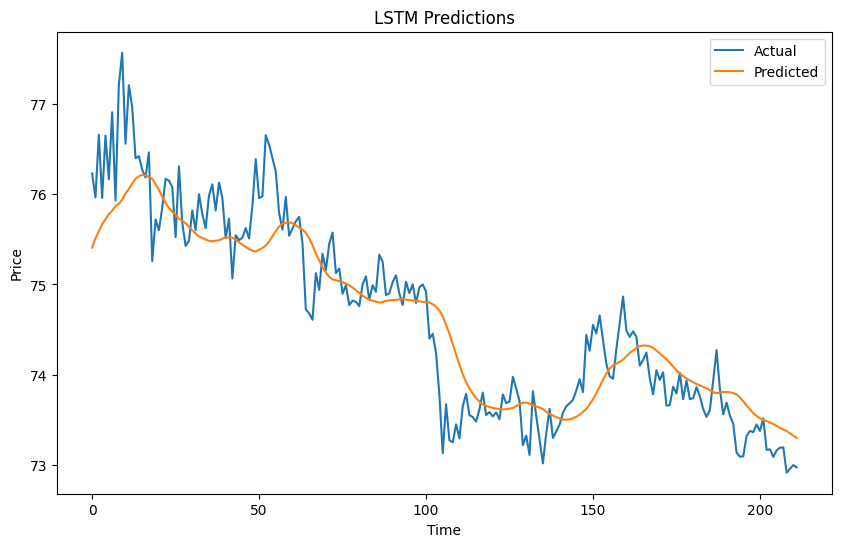

In [28]:
# Plotting the actual and predicted prices
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('LSTM Predictions')
plt.legend()
plt.show()

**Conclusion**

**Objective**: The main objective of the project was to build a predictive model for stock price prediction, aiming to help investors make informed decisions and potentially achieve profitable outcomes in the stock market.

**Data Cleaning:** Extensive data cleaning was performed to handle missing values, remove outliers, and ensure the dataset was in a suitable format for analysis. This step was crucial to ensure the accuracy and reliability of the predictive model.

**Data Feature Engineering:** Relevant features, such as opening price, closing price, high and low prices, and trading volume, were extracted from the raw data. Additional technical indicators and domain-specific features were engineered to enhance the model's predictive power.

**Exploratory Data Analysis (EDA):** EDA techniques were used to gain insights into the data, identify patterns, trends, and potential correlations between different variables. This helped in making informed decisions during the model selection and feature engineering phases.

**LSTM Model:** Long Short-Term Memory (LSTM) network, a type of recurrent neural network(RNN), was chosen for stock price prediction. LSTM's ability to capture long-term dependencies in time series data made it a suitable choice for this sequential data prediction task.

**Model Training and Evaluation:** The LSTM model was trained on historical stock price data,and its performance was evaluated using appropriate metrics such as mean squared error (MSE) and root mean squared error (RMSE). The model was optimized to achieve the best possible predictions.

**Prediction Results:** The LSTM model successfully predicted stock prices based on the historical data. The model' s accuracy was measured against the actual stock prices,providing valuable insights into its predictive capabilities.

**Project Impact:** The predictive model can be a valuable tool for investors to make wellinformed decisions in the stock market. While no model can perfectly predict stock prices due to the complex nature of the market, the developed LSTM model provides a reasonable basis for investment strategies and risk management.

**Further Improvement:** As the stock market is highly dynamic and influenced by numerous factors, continuous monitoring and refinement of the model are essential. Regular updates to the dataset, fine-tuning of the model's hyperparameters, and exploration of advanced modeling techniques could enhance the model's performance over time.